## Basic Neural Networks in PyTorch

In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

### Case1: neural net to solve regression on a dummy dataset

In [3]:
# Define the updated neural network
class MyNeuralNet(nn.Module):
    def __init__(self):
        super(MyNeuralNet, self).__init__()
        # Input layer: Linear layer maps from 2 input features to 4 hidden units
        self.fc1 = nn.Linear(2, 4, bias=True)
        # Hidden layer: Adds non-linearity with ReLU
        self.relu = nn.ReLU()
        # Output layer: Maps from 4 hidden units to 1 output
        self.fc2 = nn.Linear(4, 1, bias=True)

    def forward(self, x):
        x = self.fc1(x)  # First linear transformation
        x = self.relu(x) # Apply ReLU activation
        x = self.fc2(x)  # Second linear transformation
        return x.squeeze()  # Remove any extra dimensions for output


In [5]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define dummy data
x = torch.tensor([[6, 2], [5, 2], [1, 3], [7, 6]], dtype=torch.float32)
y = torch.tensor([1, 5, 2, 5], dtype=torch.float32)

# Initialize the model, loss function, and optimizer
model = MyNeuralNet()
loss_fn = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 4000
losses = []
for epoch in range(epochs):
    # Forward pass
    yhat = model(x)
    loss = loss_fn(yhat, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")

# Print final predictions
print("\nFinal Predictions:")
print("yhat:", model(x).detach().numpy())
print("y:", y.numpy())

Epoch 0: Loss = 3.0780811309814453
Epoch 50: Loss = 2.302645444869995
Epoch 100: Loss = 2.242560863494873
Epoch 150: Loss = 2.23268461227417
Epoch 200: Loss = 2.222545862197876
Epoch 250: Loss = 2.211304187774658
Epoch 300: Loss = 2.198540210723877
Epoch 350: Loss = 2.183863878250122
Epoch 400: Loss = 2.1668572425842285
Epoch 450: Loss = 2.1470892429351807
Epoch 500: Loss = 2.1241180896759033
Epoch 550: Loss = 2.0974888801574707
Epoch 600: Loss = 2.0667243003845215
Epoch 650: Loss = 2.03171968460083
Epoch 700: Loss = 1.991860270500183
Epoch 750: Loss = 1.9469380378723145
Epoch 800: Loss = 1.8988090753555298
Epoch 850: Loss = 1.84666109085083
Epoch 900: Loss = 1.7906874418258667
Epoch 950: Loss = 1.7308896780014038
Epoch 1000: Loss = 1.66828453540802
Epoch 1050: Loss = 1.6028759479522705
Epoch 1100: Loss = 1.5356534719467163
Epoch 1150: Loss = 1.4650228023529053
Epoch 1200: Loss = 1.3935011625289917
Epoch 1250: Loss = 1.3222496509552002
Epoch 1300: Loss = 1.2537909746170044
Epoch 1350: 

**Notes**

*   Since dataset size is very small, epochs need to be very large to get a proper fit



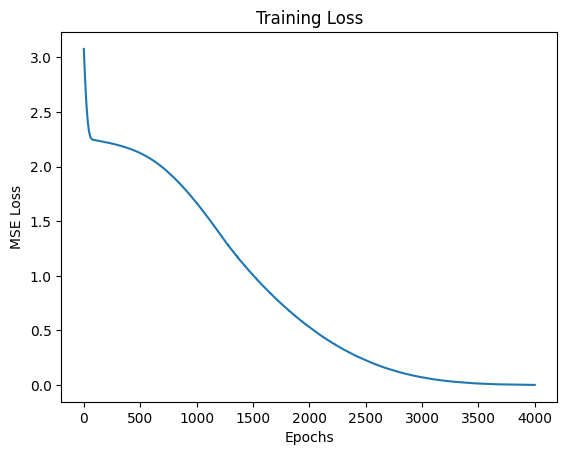

In [6]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()


### Case 2: XOR network

Epoch [1000/10000], Loss: 0.2725
Epoch [2000/10000], Loss: 0.2631
Epoch [3000/10000], Loss: 0.2573
Epoch [4000/10000], Loss: 0.2539
Epoch [5000/10000], Loss: 0.2520
Epoch [6000/10000], Loss: 0.2510
Epoch [7000/10000], Loss: 0.2504
Epoch [8000/10000], Loss: 0.2501
Epoch [9000/10000], Loss: 0.2499
Epoch [10000/10000], Loss: 0.2499


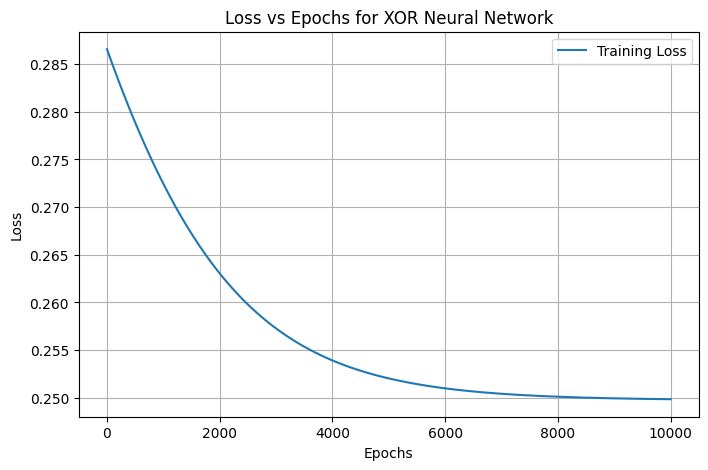

In [7]:
# Define the Neural Network
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Hidden layer with 4 neurons
        self.output = nn.Linear(4, 1)  # Output layer with 1 neuron
        self.activation = nn.Sigmoid()  # Sigmoid activation function

    def forward(self, x):
        x = self.activation(self.hidden(x))  # Apply hidden layer + activation
        x = self.activation(self.output(x))  # Apply output layer + activation
        return x

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# XOR Dataset
data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
labels = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)


# Re-initialize model, loss function, optimizer for fresh training
model = XORNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Track loss over epochs
loss_history = []

# Training Loop
epochs = 10000
for epoch in range(epochs):
    predictions = model(data)
    loss = criterion(predictions, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plot Loss vs Epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), loss_history, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for XOR Neural Network")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
model(data)

tensor([[0.5089],
        [0.5048],
        [0.5184],
        [0.5131]], grad_fn=<SigmoidBackward0>)

Epoch [1000/2000], Loss: 0.0138
Epoch [2000/2000], Loss: 0.0048


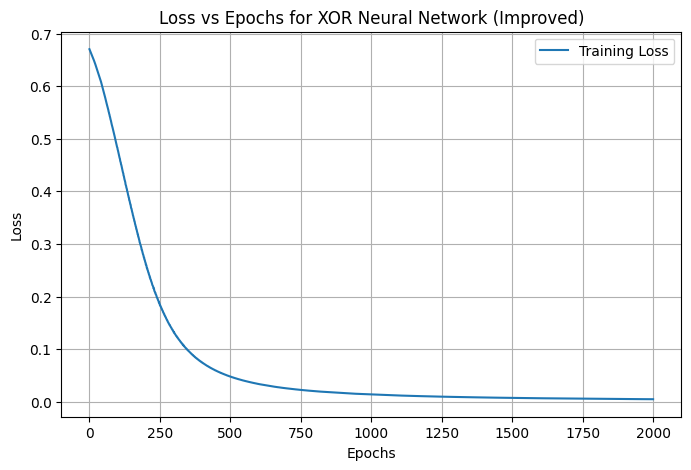

In [9]:
# Define the Neural Network with ReLU
class XORNetImproved(nn.Module):
    def __init__(self):
        super(XORNetImproved, self).__init__()
        self.hidden = nn.Linear(2, 8)  # Hidden layer with 8 neurons
        self.output = nn.Linear(8, 1)  # Output layer with 1 neuron
        self.relu = nn.ReLU()  # ReLU activation for hidden layer
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for output

    def forward(self, x):
        x = self.relu(self.hidden(x))  # Apply ReLU to hidden layer
        x = self.sigmoid(self.output(x))  # Apply Sigmoid to output
        return x

# Initialize improved model, loss function, and optimizer
model = XORNetImproved()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Track loss over epochs
loss_history = []

# Training Loop
epochs = 2000
for epoch in range(epochs):
    predictions = model(data)
    loss = criterion(predictions, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plot Loss vs Epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), loss_history, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for XOR Neural Network (Improved)")
plt.legend()
plt.grid(True)
plt.show()

**Key Changes:**

    ReLU Activation:
        Allowed better gradient flow, improving learning for hidden layers.
    Increased Neurons:
        Provided the capacity to model the XOR problem's non-linearity.
    Binary Cross-Entropy:
        Tailored for classification, it optimized the network outputs to match the XOR labels.

**Convergence in Loss:**

    The combination of these improvements enabled the model to find optimal weights and biases that minimize the loss function, reducing the error over time.

In [10]:
model(data)

tensor([[0.0074],
        [0.9962],
        [0.9962],
        [0.0040]], grad_fn=<SigmoidBackward0>)